In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select*from useducation', con = engine)
engine.dispose()


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [4]:
print(df.isnull().sum()/df.isnull().count())

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

In [5]:
#Notice that the data has a time dimension (year). For this assignment, forget about time 
#and treat all the observations as if they're from the same year. 
#Choose a strategy to deal with the missing values for each variables.
#For which variables would filling in the missing values with some value make sense?
#For which might tossing out the records entirely make sense?

In [6]:
fill_df = df.copy()
fill_df.isnull()
fill_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [7]:
need_to_fill = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE',
             'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
            'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 
            'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 
            'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE']
for col in need_to_fill:
    fill_df.loc[:,col] = fill_df.loc[:,col].fillna(fill_df.loc[:,col].mean())


In [8]:
#Now, take into account the time factor. Replicate your second answer but this time 
#fill in the missing values by using a statistic that is calculated within the year
#of the observation. For example, if you want to fill a missing value for a variable
#with the mean of that variable, calculate the mean by using only the observations for that specific year.
df_3 = df.copy()
year = df_3['YEAR'].unique()
for year in need_to_fill:
    df_3.loc[df_3['YEAR']==year,col] = df_3.loc[df_3['YEAR']==year,col].fillna(df_3.loc[df_3['YEAR']==year][col].mean())


C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [9]:
#This time, fill in the missing values using interpolation (extrapolation).
df_4 = df.copy()
for col in need_to_fill:
    df_4.loc[:,col] = df_4.loc[:,col].interpolate()
    


In [10]:
#Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?
for col in need_to_fill:
    print('Stats for: {}'.format(col))
    print(pd.concat([df[col], fill_df[col], df_3[col], df_4[col]], axis = 1).describe())

Stats for: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.229000e+03  1.456000e+03
mean   9.159308e+05  9.159308e+05  9.159308e+05  1.005984e+06
std    1.065280e+06  9.667725e+05  1.065280e+06  1.009158e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.583140e+05  2.973995e+05
50%    6.483130e+05  8.204140e+05  6.483130e+05  7.540845e+05
75%    1.014528e+06  9.211780e+05  1.014528e+06  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Stats for: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.280000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.092082e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.174519e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.186305e+06   2.546261e+06
50%

          GRADES_8_G     GRADES_8_G     GRADES_8_G     GRADES_8_G
count    1361.000000    1492.000000    1361.000000    1492.000000
mean    64271.057311   64271.057311   64271.057311   59511.380027
std     78910.545776   75364.301721   78910.545776   77123.573668
min       437.000000     437.000000     437.000000     437.000000
25%     13342.000000   15682.750000   13342.000000   10252.000000
50%     43339.000000   49571.000000   43339.000000   38114.500000
75%     76566.000000   72131.000000   76566.000000   72598.250000
max    500143.000000  500143.000000  500143.000000  500143.000000
Stats for: GRADES_12_G
        GRADES_12_G    GRADES_12_G   GRADES_12_G    GRADES_12_G
count    1361.00000    1492.000000    1361.00000    1492.000000
mean    54268.92432   54268.924320   54268.92432   50207.239276
std     67889.27623   64838.328605   67889.27623   66309.867155
min       311.00000     311.000000     311.00000     311.000000
25%     10919.00000   13437.000000   10919.00000    8951.000000

# 我不喜欢数字，想看图片

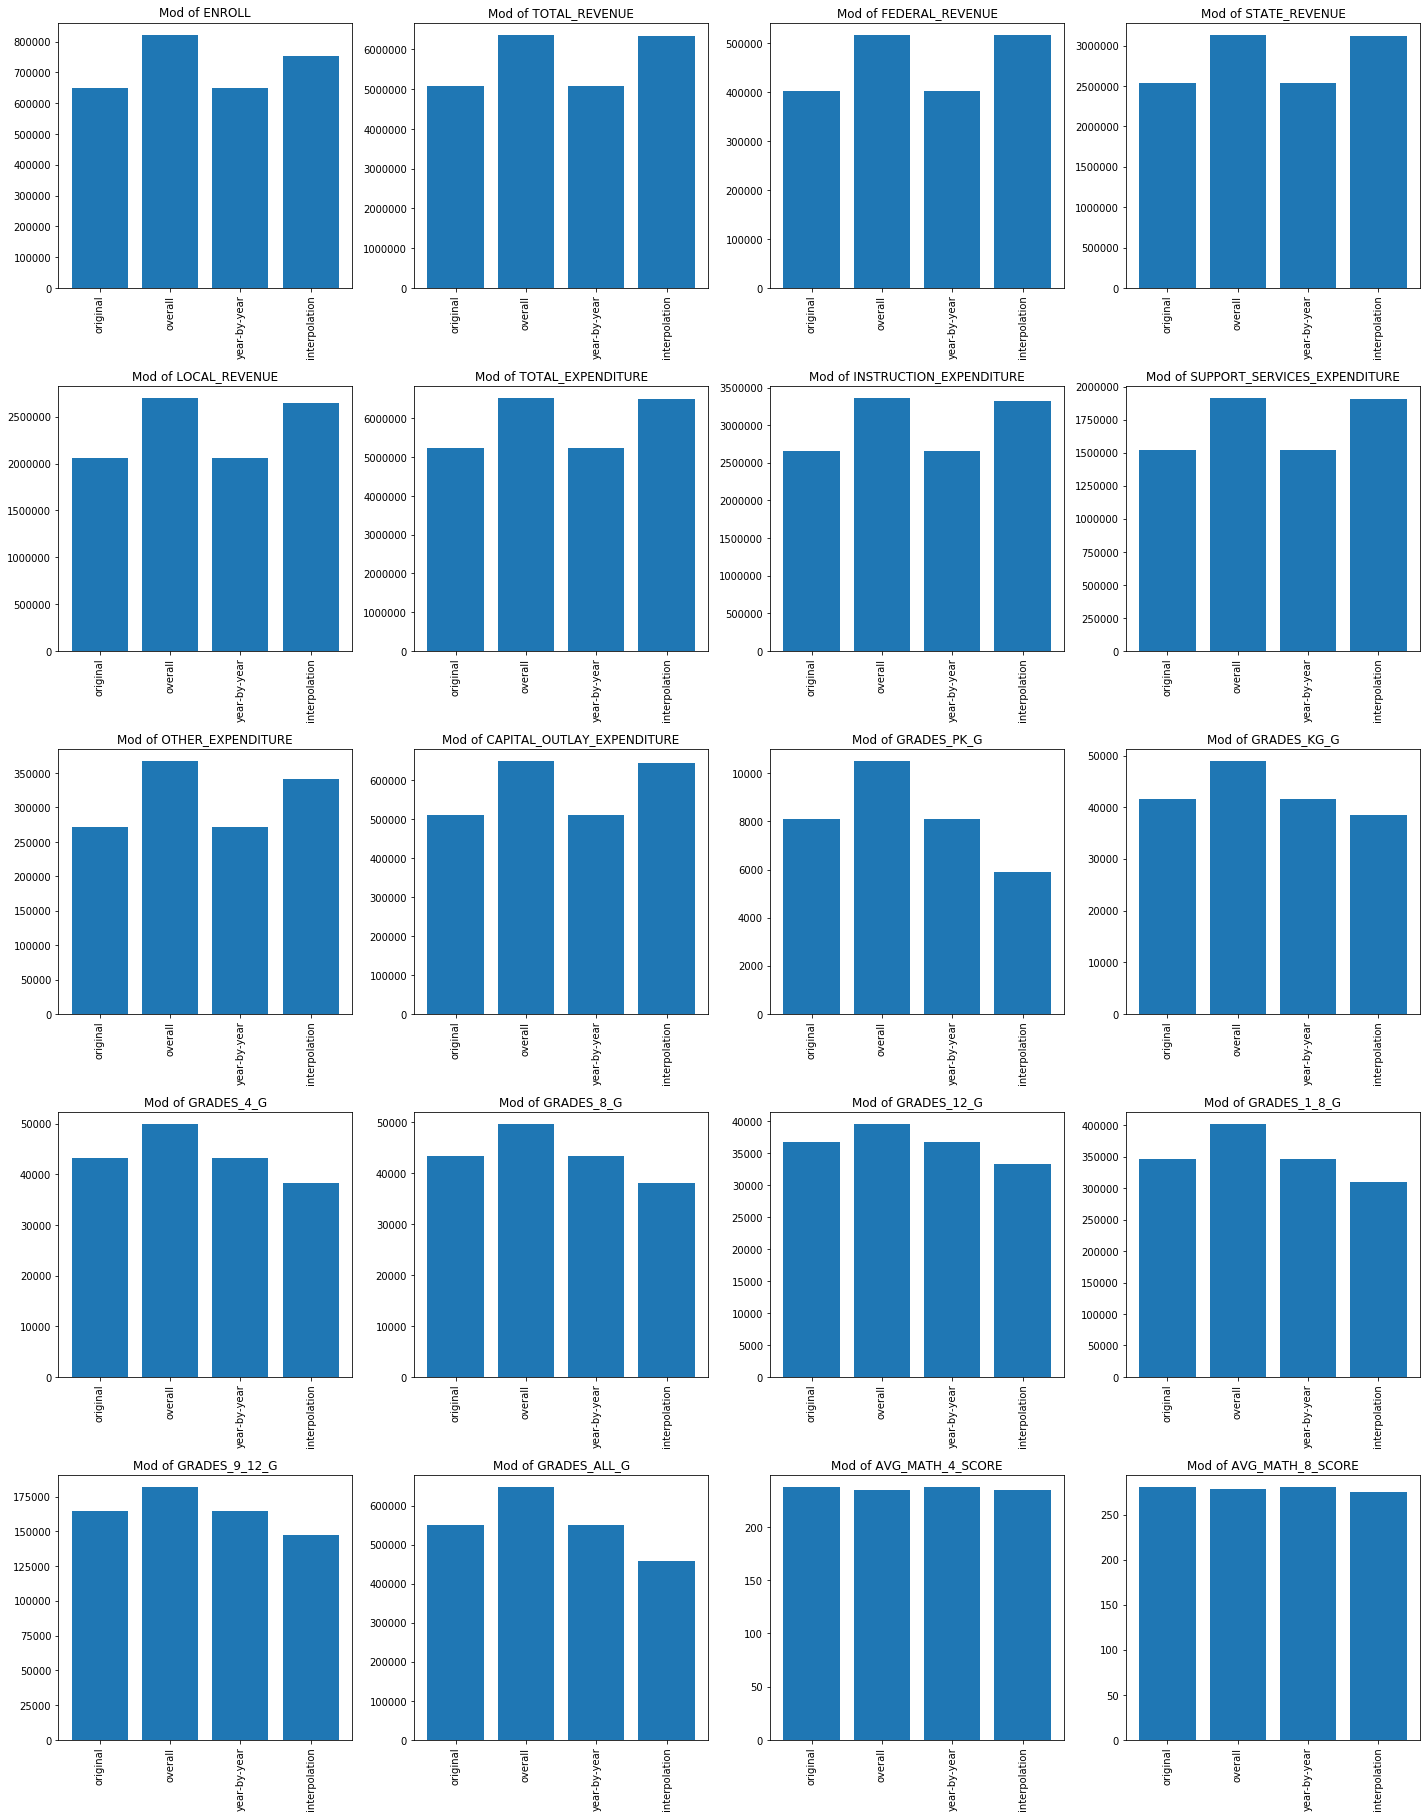

In [11]:
fig = plt.figure(figsize = (20,100))
for i, col in enumerate(need_to_fill):
    df_all = pd.concat([df[col], fill_df[col], df_3[col], df_4[col]], axis = 1)
    plt.subplot(len(need_to_fill), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df_all.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()    
plt.show()